In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd

%config InlineBackend.rc = {}
%matplotlib inline

In [2]:
data_path = './data/PESSTO/'

# Catalogues
photometry_path = data_path + 'Multi-epoch Photometry Catalogue/'
transient_path = data_path + 'Transient Catalogue/'
# Data
imaging_path = data_path + 'Imaging Data/'
spectral_path = data_path + 'Spectral Data/'

## Transient Catalogue Exploration

In [3]:
trans_cat_filename = 'ADP.2017-08-24T09:39:15.903.fits'

hdu_list = fits.open(transient_path + trans_cat_filename)
hdu_list.info()

Filename: ./data/PESSTO/Transient Catalogue/ADP.2017-08-24T09:39:15.903.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   ()      
  1  PHASE3CATALOG    1 BinTableHDU    227   1035R x 30C   [50A, 50A, E, E, 20A, I, 20A, I, J, E, 20A, I, I, J, E, 10A, I, I, 50A, E, E, E, E, 10A, E, 10A, E, E, 50A, 200A]   


In [4]:
# Display PRIMARY HDU Info
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
DATE    = '2017-08-14T13:45:06' / Date the file was written                     
TELESCOP= 'ESO-NTT '           / ESO Telescope designation                      
INSTRUME= 'EFOSC   '           / Instrument name                                
RADECSYS= 'FK5     '           / Coordinate reference frame                     
MJD-OBS =                55930 / Start of observations (days)                   
MJD-END =                57509 / End of observations (days)                     
PROG_ID = 'MULTI   '           / ESO programme identification                   
PROGID1 = '188.D-3003'      

In [5]:
# Has PRIMARY HDU got any data?
print(hdu_list[0].data is not None)

False


In [6]:
# Display BINTABLE HDU Info
hdu_list[1].header

XTENSION= 'BINTABLE'           / FITS Extension first keyword                   
BITPIX  =                    8 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  554 / width of table in bytes                        
NAXIS2  =                 1035 / number of rows in table                        
PCOUNT  =                    0 / Parameter count                                
GCOUNT  =                    1 / Group count                                    
TFIELDS =                   30 / number of columns                              
EXTNAME = 'PHASE3CATALOG'      / FITS Extension name                            
TTYPE1  = 'TRANSIENT_ID'       / Label for field 1                              
TFORM1  = '50A     '           / Data format of field 1                         
TUNIT1  = '' / Physical unit for field 1                                        
TCOMM1  = 'The master name o

In [7]:
# Has BINTABLE HDU got any data?
print(hdu_list[1].data is not None)

True


We realize that the first header is the file metadata, which contains information about the catalogue itself. On the other hand, the second header is a binary table with the contents of the catalogue.

In [8]:
# Transform Catalogue to Pandas
transient_df = Table(hdu_list[1].data).to_pandas()
# Close HDU file
hdu_list.close()

#### Sample Row

In [9]:
transient_df.iloc[0]

TRANSIENT_ID                                                   SN2013U
TRANSIENT_DISCOVERY_ID                             PSNJ100112000019423
TRANSIENT_RAJ2000                                                150.3
TRANSIENT_DECJ2000                                            0.328417
TRANSIENT_CLASSIFICATION                                         SN Ia
TRANSIENT_CLASSIFICATION_PECULIAR_FLAG                               1
TRANSIENT_CLASSIFICATION_SOURCE                              CBET 3410
TRANSIENT_CLASSIFICATION_ATEL                                        0
TRANSIENT_CLASSIFICATION_MJD                                     56329
TRANSIENT_CLASSIFICATION_REDSHIFT                              0.03451
TRANSIENT_CLASSIFICATION_PHASE                                 pre-max
TRANSIENT_CLASSIFICATION_PHASE_DAYS_LOWER_LIMIT                     -7
TRANSIENT_CLASSIFICATION_PHASE_DAYS_UPPER_LIMIT                     -4
TRANSIENT_DISCOVERY_MJD                                          56297
TRANSI

# Imaging Data Exploration

#### Filename for the transient in a given time

In [10]:
sample_img_name = 'ASASSN-14ko_20141221_J_merge_57621_1'
sample_img_filename = 'ASASSN-14ko_20141221_J_merge_57621_1' + '.fits'

In [11]:
hdu_list = fits.open(imaging_path + sample_img_filename)
hdu_list.info()

Filename: ./data/PESSTO/Imaging Data/ASASSN-14ko_20141221_J_merge_57621_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (1222, 1204)   float32   


In [12]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1222                                                  
NAXIS2  =                 1204                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
IRAF-TLM= '2016-08-21T11:35:03' / Time of last modification                     
DATE    = '2016-08-21T11:14:41' / UT date when this file was written            
TELESCOP= 'ESO-NTT '           / ESO Telescope Name                             
INSTRUME= 'SOFI    '           / Instrument used.                               
OBJECT  = 'ASASSN-14ko'        / Original target.                               
RA      =             81.32997 / 05:25:19.19 RA (J2000) pointing (deg)          
DEC     =            -46.008

In [13]:
hdu_list[0].header[24:28]

CRVAL1  =        81.3309660705 / RA at ref pixel                                
CRVAL2  =       -46.0116377471 / DEC at ref pixel                               
CRPIX1  =        649.027065206 / Ref pixel in X                                 
CRPIX2  =        593.765396181 / Ref pixel in Y                                 

In [14]:
# CRPIX
X = hdu_list[0].header['CRPIX1']
Y = hdu_list[0].header['CRPIX2']
X,Y

(649.027065206, 593.765396181)

In [15]:
# NTCRPIX
# X = hdu_list[0].header['NTCRPIX1']
# Y = hdu_list[0].header['NTCRPIX2']
# X,Y

In [16]:
image_data = hdu_list[0].data
hdu_list.close()
#del hdu_list

### Display images

### Original Image

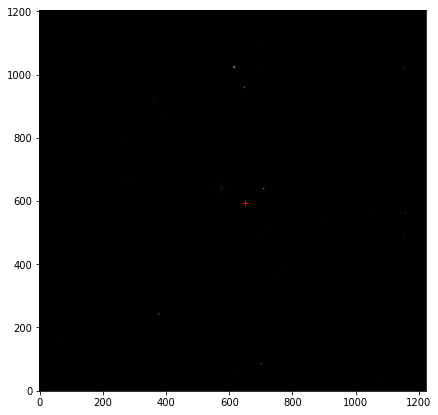

In [17]:
plt.figure(figsize=(7,7))
plt.imshow(image_data, origin='lower', cmap='gray')
plt.plot([ X ],[Y], 'r+')

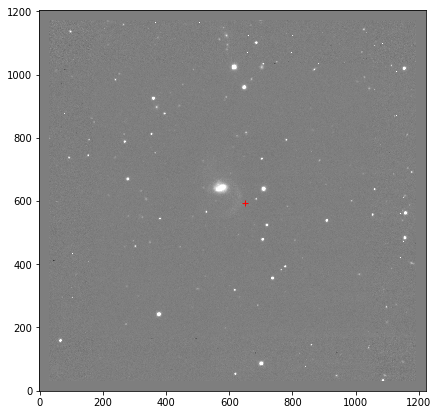

In [18]:
#image_data /= 255.0
minpx = np.mean(image_data)-2.5*np.std(image_data) 
maxpx = np.mean(image_data)+2.5*np.std(image_data)

plt.figure(figsize=(7,7))
plt.imshow(image_data, origin='lower', cmap='gray', vmin=minpx, vmax=maxpx)
plt.plot([ X ],[Y], 'r+')

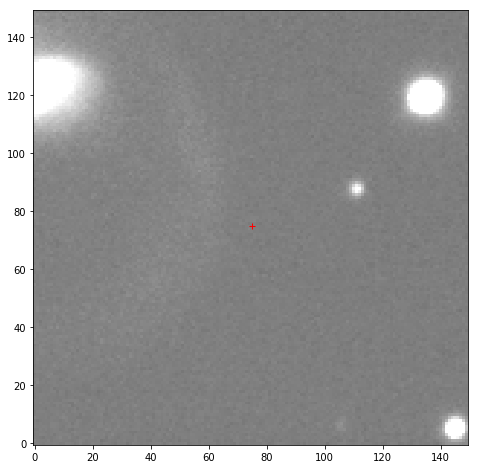

In [19]:
from PIL import Image
side = 150
s = side / 2
img = Image.fromarray(image_data).crop( (X-s,Y-s, X+s, Y+s))
plt.figure(figsize=(8,8))
crop = np.copy(np.asarray(img))
plt.imshow(crop, origin='lower', cmap='gray', vmin=minpx, vmax=maxpx)
plt.plot([s],[s], 'r+')

## Imaging Weights Data Exploration

In [20]:
sample_img_weight_filename = sample_img_name + '.weight.fits'
hdu_list = fits.open(imaging_path + sample_img_weight_filename)
hdu_list.info()

Filename: ./data/PESSTO/Imaging Data/ASASSN-14ko_20141221_J_merge_57621_1.weight.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     257   (1222, 1204)   float32   


In [21]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1222                                                  
NAXIS2  =                 1204                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
IRAF-TLM= '2016-08-21T11:34:57' / Time of last modification                     
DATE    = '2016-08-21T11:14:41' / UT date when this file was written            
TELESCOP= 'ESO-NTT '           / ESO Telescope Name                             
INSTRUME= 'SOFI    '           / Instrument used.                               
OBJECT  = 'ASASSN-14ko'        / Original target.                               
RA      =             81.32997 / 05:25:19.19 RA (J2000) pointing (deg)          
DEC     =            -46.008

In [22]:
image_data = hdu_list[0].data
hdu_list.close()
del hdu_list

### Display images

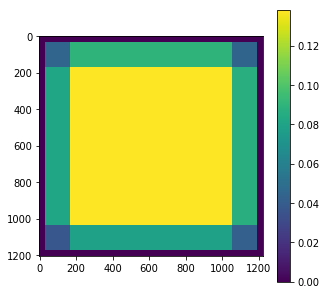

In [23]:
plt.figure(figsize=(5,5))
plt.imshow(image_data)
plt.colorbar()

## Photometry Catalogue Exploration

In [24]:
photometry_filename = 'ADP.2017-08-24T13:14:25.964.fits'

hdu_list = fits.open(photometry_path + photometry_filename)
hdu_list.info()

Filename: ./data/PESSTO/Multi-epoch Photometry Catalogue/ADP.2017-08-24T13:14:25.964.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  PHASE3CATALOG    1 BinTableHDU    315   2488R x 43C   [J, 50A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [25]:
# Display PRIMARY HDU Info
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
DATE    = '2017-08-21T15:21:05' / Date the file was written                     
TELESCOP= 'ESO-NTT '           / Telescope                                      
INSTRUME= 'MULTI   '           / Instrument name                                
INSTR1  = 'EFOSC   '           / Instrument name                                
INSTR2  = 'SOFI    '           / Instrument name                                
NOESODAT=                    T / True if non-ESO data used                      
MJD-OBS =                56013 / Start of observations (days)                   
MJD-END =                575

In [26]:
# Display BINTABLE HDU Info
hdu_list[1].header

XTENSION= 'BINTABLE'           / FITS Extension first keyword                   
BITPIX  =                    8 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  218 / width of table in bytes                        
NAXIS2  =                 2488 / number of rows in table                        
PCOUNT  =                    0 / Parameter count                                
GCOUNT  =                    1 / Group count                                    
TFIELDS =                   43 / number of columns                              
EXTNAME = 'PHASE3CATALOG'      / FITS Extension name                            
TTYPE1  = 'PHOT_ID '           / Label for field 1                              
TFORM1  = 'J       '           / Data format of field 1                         
TUNIT1  = '' / Physical unit of field 1                                         
TCOMM1  = 'Photometric Data 

Likewise, this catalog contains two headers where the first is the file metadata, and the second is a binary table with the contents of the catalogue.

In [27]:
# Transform Catalogue to Pandas
spectral_df = Table(hdu_list[1].data).to_pandas()
# Close HDU file
hdu_list.close()

#### Sample Catalogue row

In [28]:
transient_df.iloc[0]

TRANSIENT_ID                                                   SN2013U
TRANSIENT_DISCOVERY_ID                             PSNJ100112000019423
TRANSIENT_RAJ2000                                                150.3
TRANSIENT_DECJ2000                                            0.328417
TRANSIENT_CLASSIFICATION                                         SN Ia
TRANSIENT_CLASSIFICATION_PECULIAR_FLAG                               1
TRANSIENT_CLASSIFICATION_SOURCE                              CBET 3410
TRANSIENT_CLASSIFICATION_ATEL                                        0
TRANSIENT_CLASSIFICATION_MJD                                     56329
TRANSIENT_CLASSIFICATION_REDSHIFT                              0.03451
TRANSIENT_CLASSIFICATION_PHASE                                 pre-max
TRANSIENT_CLASSIFICATION_PHASE_DAYS_LOWER_LIMIT                     -7
TRANSIENT_CLASSIFICATION_PHASE_DAYS_UPPER_LIMIT                     -4
TRANSIENT_DISCOVERY_MJD                                          56297
TRANSI

#### Count number of NaNs per column

In [29]:
# Proportion of null values per column
total = transient_df.isnull().sum()
proportion = transient_df.isnull().sum() / len(transient_df)*100
pd.concat([total, proportion], axis=1, keys= ['Total', 'Percentage'])

,Total,Percentage
TRANSIENT_ID,0,0.000000
TRANSIENT_DISCOVERY_ID,0,0.000000
TRANSIENT_RAJ2000,0,0.000000
TRANSIENT_DECJ2000,0,0.000000
TRANSIENT_CLASSIFICATION,0,0.000000
TRANSIENT_CLASSIFICATION_PECULIAR_FLAG,0,0.000000
TRANSIENT_CLASSIFICATION_SOURCE,0,0.000000
TRANSIENT_CLASSIFICATION_ATEL,0,0.000000
TRANSIENT_CLASSIFICATION_MJD,0,0.000000
TRANSIENT_CLASSIFICATION_REDSHIFT,45,4.347826


## Spectral Data Exploration

In [30]:
sample_spectral_filename_binary = 'ASASSN-14ko_20141211_Gr11_Free_slit1.0_57595_1_sb.fits'

# Sample 
# sample_spectral_filename_1d = 'ASASSN-14ko_20141211_Gr16_OG530_slit1.0_57595_1_sb'

# Different slit
# sample_spectral_filename_1d = 'ASASSN-14ko_20141211_Gr16_OG530_slit1.0_57595_1_sb'

# Others: grism, filter, slit width

In [34]:
# Display PRIMARY HDU Info
hdu_list = fits.open(spectral_path + sample_spectral_filename_binary)
hdu_list.info()

Filename: ./data/PESSTO/Spectral Data/ASASSN-14ko_20141211_Gr11_Free_slit1.0_57595_1_sb.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     281   ()      
  1  PHASE3BINTABLE    1 BinTableHDU     46   1R x 4C   [1011E, 1011E, 1011E, 1011E]   


In [35]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
IRAF-TLM= '2016-07-26T14:27:39' / Time of last modification                     
DATE    = '2016-07-26T14:27:27' / UT date when this file was written            
TELESCOP= 'ESO-NTT '           / ESO Telescope Name                             
INSTRUME= 'EFOSC   '           / Instrument used.                               
OBJECT  = 'ASASSN-14ko'        / Original target.                               
RA      =        81.3255416667 / 05:25:18.13 RA (J2000) pointing (deg)          
DEC     =            -46.00565 / -46:00:20.3 DEC (J2000) pointing (deg)         
EQUINOX =                 20

In [36]:
hdu_list[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                16176 / Length of data axis 1                          
NAXIS2  =                    1 / Axis length                                    
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
OBJECT  = 'ASASSN-14ko'        / Original target.                               
RA      =        81.3255416667 / 05:25:18.13 RA (J2000) pointing (deg)          
DEC     =            -46.00565 / -46:00:20.3 DEC (J2000) pointing (deg)         
CHECKSUM= 'ChdcFgcZCgcaCgcY'   / HDU checksum updated 2017-08-30T17:18:19       
DATASUM = '3007086606'      

In [38]:
spectral_data = hdu_list[1].data

In [39]:
hdu_list.close()

#### 2-D Spectral Data

In [40]:
sample_spectral_filename = 'ASASSN-14ko_20141211_Gr11_Free_slit1.0_57595_1_si.fits'

In [41]:
hdu_list = fits.open(spectral_path + sample_spectral_filename)
hdu_list.info()

Filename: ./data/PESSTO/Spectral Data/ASASSN-14ko_20141211_Gr11_Free_slit1.0_57595_1_si.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     288   (851, 1011)   float32   


In [42]:
# Display PRIMARY HDU Info
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  851                                                  
NAXIS2  =                 1011                                                  
ORIGIN  = 'ESO     '           / European Southern Observatory                  
IRAF-TLM= '2016-07-26T14:27:31' / Time of last modification                     
DATE    = '2016-07-26T13:55:24' / UT date when this file was written            
TELESCOP= 'ESO-NTT '           / ESO Telescope Name                             
INSTRUME= 'EFOSC   '           / Instrument used.                               
OBJECT  = 'ASASSN-14ko'        / Original target.                               
RA      =        81.3255416667 / 05:25:18.13 RA (J2000) pointing (deg)          
DEC     =            -46.005

Likewise, this catalog contains two headers where the first is the file metadata, and the second is a binary table with the contents of the catalogue.

In [43]:
spectral_data = hdu_list[0].data

In [44]:
# Close HDU file
hdu_list.close()

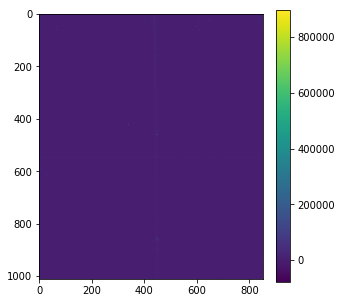

In [45]:
plt.figure(figsize=(5,5))
plt.imshow(spectral_data)
plt.colorbar()

#### Sample Catalogue row

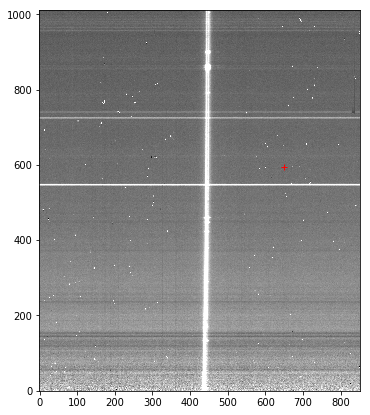

In [46]:
#image_data /= 255.0
minpx = np.mean(spectral_data)-2.5*np.std(spectral_data) 
maxpx = np.mean(spectral_data)+2.5*np.std(spectral_data)

plt.figure(figsize=(7,7))
plt.imshow(spectral_data, origin='lower', cmap='gray', vmin=minpx, vmax=maxpx)
plt.plot([ X ],[Y], 'r+')

#### Count number of NaNs per column

In [ ]:
# Proportion of null values per column
total = spectral_.isnull().sum()
proportion = spectral_df.isnull().sum() / len(spectral_df)*100
pd.concat([total, proportion], axis=1, keys= ['Total', 'Percentage'])